In [ ]:
pip install tensorflow==1.13.1

In [ ]:
pip install keras==2.2.0

     |████████████████████████████████| 300 kB 4.3 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Attempting uninstall: keras-applications
    Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.13.1 requires keras-applications>=1.0.6, but you have keras-applications 1.0.2 which is incompatible.
tensorflow 1.13.1 requires keras-preprocessin

In [ ]:
import tensorflow as tf
import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
if tf.test.is_gpu_available():
    BATCH_SIZE = 512  # Number of examples used in each iteration
    EPOCHS = 5  # Number of passes through entire dataset
    MAX_LEN = 75  # Max length of review (in words)
    EMBEDDING = 40  # Dimension of word embedding vector

    
# Hyperparams for CPU training
else:
    BATCH_SIZE = 32
    EPOCHS = 5
    MAX_LEN = 75
    EMBEDDING = 20

In [ ]:
data = pd.read_csv("/content/bc5cdr_train.tsv",sep='\t',quoting=3, error_bad_lines=False)
data.head()
#data = data.fillna(method="ffill")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Word,Tag
0,Selegiline,S-Chemical
1,-,O
2,induced,O
3,postural,B-Disease
4,hypotension,E-Disease


In [ ]:
#counting sentences based on full-stop
data['Sentence #']=""
count=1
#s=str(count)
for index,row in data.iterrows():
  row['Sentence #']="Sentence: "+str(count)
  if(row['Word']=="."):
    count=count+1

In [ ]:
data.head()

,Word,Tag,Sentence #
0,Selegiline,S-Chemical,Sentence: 1
1,-,O,Sentence: 1
2,induced,O,Sentence: 1
3,postural,B-Disease,Sentence: 1
4,hypotension,E-Disease,Sentence: 1


In [ ]:
words = list(set(data["Word"].values))
n_words = len(words)
print("Number of words in the dataset: ", n_words)

Number of words in the dataset:  9981


In [ ]:
tags = list(set(data["Tag"].values))
n_tags = len(tags); n_tags

9

In [ ]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data 
        self.empty = False
        agg_func = lambda s: [(w,t) for w,t in zip(s["Word"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
#result on 1 sentence
getter = SentenceGetter(data)
sent = getter.get_next()
print(sent)

[('Selegiline', 'S-Chemical'), ('-', 'O'), ('induced', 'O'), ('postural', 'B-Disease'), ('hypotension', 'E-Disease'), ('in', 'O'), ('Parkinson', 'B-Disease'), ("'", 'I-Disease'), ('s', 'I-Disease'), ('disease', 'E-Disease'), (':', 'O'), ('a', 'O'), ('longitudinal', 'O'), ('study', 'O'), ('on', 'O'), ('the', 'O'), ('effects', 'O'), ('of', 'O'), ('drug', 'O'), ('withdrawal', 'O'), ('.', 'O')]


In [ ]:
#getting results on all sentences
sentences = getter.sentences

In [ ]:
max_len = 75
#alloting a number to each gene
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
word2idx

{nan: 1,
 'hypophosphatemia': 2,
 'afterdischarges': 3,
 'zero': 4,
 'QTLs': 5,
 'angiogram': 6,
 'EPM': 7,
 'embolism': 8,
 'reversed': 9,
 'utility': 10,
 'implicates': 11,
 'More': 12,
 'HCFC': 13,
 'spontaneously': 14,
 'Hess': 15,
 '37': 16,
 'CRL': 17,
 'cell': 18,
 'led': 19,
 'microvessels': 20,
 'Independent': 21,
 'malignancy': 22,
 'contractile': 23,
 'woke': 24,
 'radionuclide': 25,
 '124': 26,
 'habituated': 27,
 'Ballistic': 28,
 'cardiovascularly': 29,
 'Amiens': 30,
 'focused': 31,
 'temazepam': 32,
 'believed': 33,
 'Head': 34,
 'progestagen': 35,
 'depletion': 36,
 'HMG': 37,
 'Findings': 38,
 'considerably': 39,
 'promoted': 40,
 'investigation': 41,
 'CD': 42,
 'Carbachol': 43,
 '0343': 44,
 'libitum': 45,
 'assisted': 46,
 'proper': 47,
 'Global': 48,
 'Guard': 49,
 'antithymocyte': 50,
 'parasympathetic': 51,
 'body': 52,
 'elderly': 53,
 'temperature': 54,
 'exposed': 55,
 'steroid': 56,
 'Caffeine': 57,
 'platin': 58,
 'ataxia': 59,
 'oxytocin': 60,
 'eosinophil

In [ ]:
tag2idx

{'B-Chemical': 7,
 'B-Disease': 5,
 'E-Chemical': 8,
 'E-Disease': 2,
 'I-Chemical': 0,
 'I-Disease': 3,
 'O': 1,
 'S-Chemical': 4,
 'S-Disease': 6}

In [ ]:
#padding to make length of each tuple same to fit in the model
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]

In [ ]:
#padding X
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=0)
print(X.shape)

(5819, 75)


In [ ]:
#encoding labels
y = [[tag2idx[w[1]] for w in s] for s in sentences]


In [ ]:
#padding labels
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])
print(y)

[[4 1 1 ... 1 1 1]
 [1 4 1 ... 1 1 1]
 [4 1 4 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [6 1 1 ... 1 1 1]]


In [ ]:
## to convert binary class matrix
from tensorflow.keras.utils import to_categorical

In [ ]:
y = [to_categorical(i, num_classes=n_tags) for i in y]

In [ ]:
y

[array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)


In [ ]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-1_g3mk2d
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-1_g3mk2d
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=a9f77907ddfd6fdfc138f94b5fec0c765bcba40acf509ce59d864f643cea3f88
  Stored in directory: /tmp/pip-ephem-wheel-cache-o5wwmca5/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib


In [ ]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF

In [ ]:
input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words + 1, output_dim=20,
                  input_length=max_len, mask_zero=True)(input)  # 20-dim embedding


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model = Bidirectional(LSTM(units=50, return_sequences=True,recurrent_dropout=0.1))(model) 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model = TimeDistributed(Dense(50, activation="relu"))(model)

In [ ]:
crf = CRF(n_tags)

In [ ]:
out = crf(model)

In [ ]:
model = Model(input, out)


In [ ]:
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])


/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 75, 20)            199640    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 75, 100)           28400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 75, 50)            5050      
_________________________________________________________________
crf_1 (CRF)                  (None, 75, 9)             558       
Total params: 233,648
Trainable params: 233,648
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_tr, np.array(y_tr), batch_size=32, epochs=5,
                    validation_split=0.1, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 4713 samples, validate on 524 samples
Epoch 1/5
4713/4713 [==============================] - 38s 8ms/step - loss: 13.0445 - crf_viterbi_accuracy: 0.8500 - val_loss: 11.5412 - val_crf_viterbi_accuracy: 0.8760
Epoch 2/5
4713/4713 [==============================] - 36s 8ms/step - loss: 12.7035 - crf_viterbi_accuracy: 0.8963 - val_loss: 11.4232 - val_crf_viterbi_accuracy: 0.9048
Epoch 3/5
4713/4713 [==============================] - 29s 6ms/step - loss: 12.6152 - crf_viterbi_accuracy: 0.9274 - val_loss: 11.3923 - val_crf_viterbi_accuracy: 0.9192
Epoch 4/5
4713/4713 [==============================] - 27s 6ms/step - loss: 12.5641 - crf_viterbi_accuracy: 0.9407 - val_loss: 11.3481 - val_crf_viterbi_accuracy: 0.9295
Epoch 5/5
4713/4713 [==============================] - 28s 6ms/step - loss: 12.5314 - crf_viterbi_accuracy: 0.9488 - val_loss: 11.3210 - val_crf_viterbi_accuracy: 0.9359


In [ ]:
hist = pd.DataFrame(history.history)

In [ ]:
hist

,val_loss,val_crf_viterbi_accuracy,loss,crf_viterbi_accuracy
0,11.541183,0.876013,13.044493,0.850029
1,11.423154,0.904825,12.703510,0.896328
2,11.392260,0.919164,12.615153,0.927351
3,11.348066,0.929497,12.564138,0.940716
4,11.321015,0.935947,12.531436,0.948776


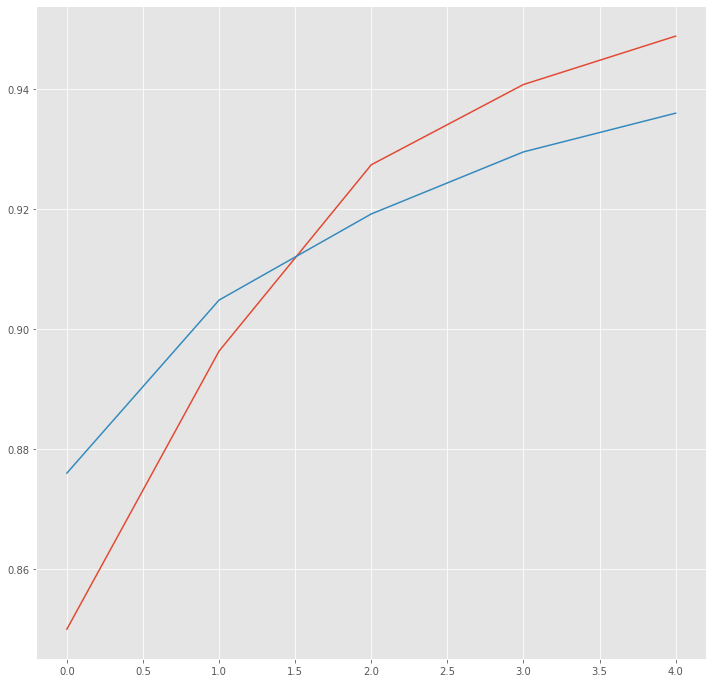

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12, 12))
plt.plot(hist["crf_viterbi_accuracy"])
plt.plot(hist["val_crf_viterbi_accuracy"])
plt.show()

In [ ]:
pip install seqeval

     |████████████████████████████████| 43 kB 1.4 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=e51b2e3486ea6f719fd04b7ce6543c09ff8885b31aa5d84015cdc3a006ed1740
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
test_pred = model.predict(X_te, verbose=1)


582/582 [==============================] - 1s 2ms/step


In [ ]:
idx2tag = {i: w for w, i in tag2idx.items()}

#converting numerical to categorical labels
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_te)

In [ ]:
test_pred

array([[[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))


F1-score: 53.8%


In [ ]:
print(classification_report(test_labels, pred_labels))


              precision    recall  f1-score   support

    Chemical       0.36      0.76      0.49       547
     Disease       0.61      0.66      0.63       427

   micro avg       0.43      0.71      0.54       974
   macro avg       0.48      0.71      0.56       974
weighted avg       0.47      0.71      0.55       974



In [ ]:
#predicting on 1 sentence
i = 450
p = model.predict(np.array([X_te[i]]))
#print(p)
p = np.argmax(p, axis=-1)
#print(p)
true = np.argmax(y_te[i], -1)
print(true)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=") 
for w, t, pred in zip(X_te[i], true, p[0]):
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-1], tags[t], tags[pred]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
Word           ||True ||Pred
001            : O     O
)              : O     O
.              : O     O


In [ ]:
i = 230
p = model.predict(np.array([X_te[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_te[i], -1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_te[i], true, p[0]):
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-1], tags[t], tags[pred]))

Word           ||True ||Pred
In             : O     O
electron       : O     O
micrographs    : O     O
both           : O     O
luminal        : S-Chemical S-Chemical
and            : O     O
antiluminal    : O     B-Disease
sides          : O     E-Disease
of             : O     O
the            : O     O
BBB            : O     O
of             : O     O
the            : O     O
cerebellar     : O     O
cortex         : O     O
had            : O     O
similar        : O     O
lesions        : O     O
.              : O     O
